# 2025 COMP90042 Project
*Make sure you change the file name with your group id.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a. Data loading and structure analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Loading JSON data
sns.set(style="whitegrid")
with open('../../data/train-claims.json', 'r') as f:
    train_data = json.load(f)

with open('../../data/dev-claims.json', 'r') as f:
    dev_data = json.load(f)

with open('../../data/test-claims-unlabelled.json', 'r') as f:
    test_data = json.load(f)

with open('../../data/evidence.json', 'r') as f:
    evidence_data = json.load(f)

# Constructing a DataFrame with a uniform structure
def json_to_df(data_dict, data_type):
    records = []
    for claim_id, item in data_dict.items():
        record = {
            'id': claim_id,
            'claim_text': item.get('claim_text', ''),
            'claim_label': item.get('claim_label', None),
            'evidences': item.get('evidences', []),
            'data_type': data_type
        }
        records.append(record)
    return pd.DataFrame(records)

df_train = json_to_df(train_data, "train")
df_dev = json_to_df(dev_data, "dev")
df_test = json_to_df(test_data, "test")  # test has no labels and evidences

# Combining train and dev data for analysis
df_all = pd.concat([df_train, df_dev], ignore_index=True)

# Adding satistics to the DataFrame
df_all['text_len'] = df_all['claim_text'].str.split().apply(len)
df_all['num_evidence'] = df_all['evidences'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_all

,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5
...,...,...,...,...,...,...,...
1377,claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85...",dev,31,4
1378,claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20...",dev,14,5
1379,claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1...",dev,16,5
1380,claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755],dev,40,1


In [2]:
df_test

,id,claim_text,claim_label,evidences,data_type
0,claim-2967,The contribution of waste heat to the global c...,None,[],test
1,claim-979,“Warm weather worsened the most recent five-ye...,None,[],test
2,claim-1609,Greenland has only lost a tiny fraction of its...,None,[],test
3,claim-1020,“The global reef crisis does not necessarily m...,None,[],test
4,claim-2599,Small amounts of very active substances can ca...,None,[],test
...,...,...,...,...,...
148,claim-293,When the measuring equipment gets old and need...,None,[],test
149,claim-910,"The cement, iron and steel, and petroleum refi...",None,[],test
150,claim-2815,A new peer-reviewed study on Surface Warming a...,None,[],test
151,claim-1652,The strong CO2 effect has been observed by man...,None,[],test


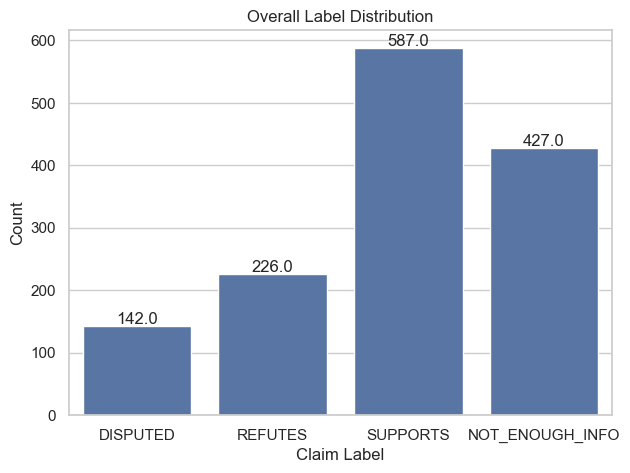

In [3]:
# 1. label distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_all, x='claim_label')
plt.title('Overall Label Distribution')
plt.xlabel('Claim Label')
plt.ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

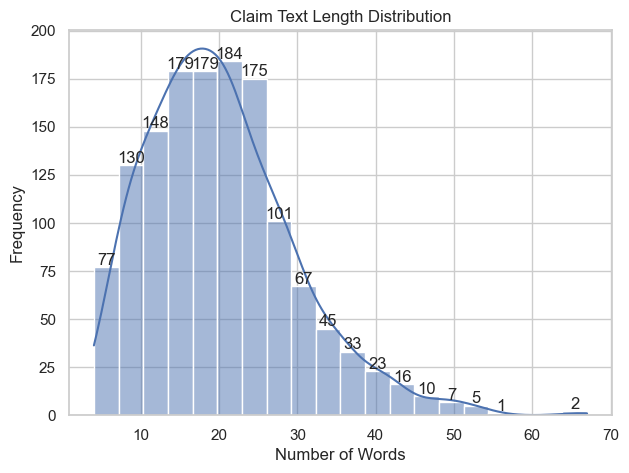

In [4]:
# 2. Claim text length distribution
plt.figure(figsize=(7, 5))
ax = sns.histplot(df_all['text_len'], bins=20, kde=True)
plt.title('Claim Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

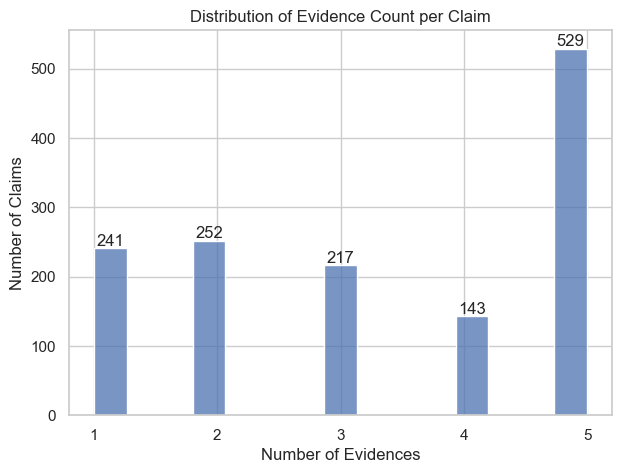

In [5]:
# 3. Evidence count distribution
plt.figure(figsize=(7, 5))
ax = sns.histplot(df_all['num_evidence'], bins=15, kde=False)
plt.title('Distribution of Evidence Count per Claim')
plt.xlabel('Number of Evidences')
plt.ylabel('Number of Claims')
plt.xticks(range(df_all['num_evidence'].min(), df_all['num_evidence'].max() + 1))  # Ensure integer ticks

# Annotate each bar with the count
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Only annotate bars with a height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### b. Text data pre-processing

In [6]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Get WordNet POS tag from NLTK POS tag
def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Main preprocessing function
def preprocess_text(text):
    # 1. normalize text (lowercase, remove extra spaces)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    # 2. tokenization
    tokens = word_tokenize(text)

    # 3. filter out stop words and non-alphanumeric tokens
    def is_valid_token(t):
        return any(c.isalnum() for c in t)

    tokens = [t for t in tokens if is_valid_token(t) and t not in stop_words]

    # 4. Lemmatization
    pos_tags = nltk.pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in pos_tags]

    return lemmas

# Preprocess the claim text
df_all['claim_tokens'] = df_all['claim_text'].apply(preprocess_text)
df_all

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,claim_text,claim_label,evidences,data_type,text_len,num_evidence,claim_tokens
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,24,3,"[scientific, evidence, co2, pollutant, high, c..."
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,17,2,"[el, niño, drove, record, highs, global, tempe..."
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,8,2,"[1946, pdo, switch, cool, phase]"
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,16,5,"[weather, channel, co-founder, john, coleman, ..."
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,19,5,"[january, 2008, cap, 12, month, period, global..."
...,...,...,...,...,...,...,...,...
1377,claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85...",dev,31,4,"['to, suddenly, label, co2, pollutant, disserv..."
1378,claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20...",dev,14,5,"[natural, orbitally, driven, warm, atmospheric..."
1379,claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1...",dev,16,5,"[many, world, coral, reef, already, barren, st..."
1380,claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755],dev,40,1,"[recent, study, lead, lawrence, livermore, nat..."


In [7]:
# Print claim_text and claim_tokens for a single row in df_all
row_index = 0 # change for testing
print("Claim Text:", df_all.loc[row_index, 'claim_text'])
print("Claim Tokens:", df_all.loc[row_index, 'claim_tokens'])

Claim Text: Not only is there no scientific evidence that CO2 is a pollutant, higher CO2 concentrations actually help ecosystems support more plant and animal life.
Claim Tokens: ['scientific', 'evidence', 'co2', 'pollutant', 'high', 'co2', 'concentration', 'actually', 'help', 'ecosystems', 'support', 'plant', 'animal', 'life']


In [ ]:
# Preprocess the evidence data(it will take about 10 minutes, just run it once)
from tqdm import tqdm

evidence_data_tokens = {
    evid_id: preprocess_text(text) for evid_id, text in tqdm(evidence_data.items())
}


In [ ]:
import os
import json

# Save the preprocessed evidence data tokens to a JSON file
os.makedirs('../../data', exist_ok=True)
save_path = '../../data/evidence_data_tokens.json'

with open(save_path, 'w', encoding='utf-8') as f:
    json.dump(evidence_data_tokens, f)

print(f"Saved preprocessed evidence tokens to: {save_path}")


In [7]:
import json

# Load the preprocessed evidence data tokens from the JSON file
with open('../../data/evidence_data_tokens.json', 'r', encoding='utf-8') as f:
    evidence_data_tokens = json.load(f)

# Print the first evidence ID and its preprocessed tokens
first_id = list(evidence_data_tokens.keys())[0]
print(f"Evidence ID: {first_id}")
print("\nPreprocessed Tokens:")
print(evidence_data_tokens[first_id])
original_text = evidence_data[first_id]
print("Original Text:")
print(original_text)

Evidence ID: evidence-0

Preprocessed Tokens:
['john', 'bennet', 'lawes', 'english', 'entrepreneur', 'agricultural', 'scientist']
Original Text:
John Bennet Lawes, English entrepreneur and agricultural scientist


In [8]:
# Preprocess the claim text in train and dev data
df_train['claim_tokens'] = df_train['claim_text'].apply(preprocess_text)
df_dev['claim_tokens'] = df_dev['claim_text'].apply(preprocess_text)
df_train

,id,claim_text,claim_label,evidences,data_type,claim_tokens
0,claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1...",train,"[scientific, evidence, co2, pollutant, high, c..."
1,claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]",train,"[el, niño, drove, record, highs, global, tempe..."
2,claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]",train,"[1946, pdo, switch, cool, phase]"
3,claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5...",train,"[weather, channel, co-founder, john, coleman, ..."
4,claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72...",train,"[january, 2008, cap, 12, month, period, global..."
...,...,...,...,...,...,...
1223,claim-1504,Climate scientists say that aspects of the cas...,SUPPORTS,"[evidence-1055682, evidence-1047356, evidence-...",train,"[climate, scientist, say, aspect, case, hurric..."
1224,claim-243,"In its 5th assessment report in 2013, the IPCC...",SUPPORTS,[evidence-916755],train,"[5th, assessment, report, 2013, ipcc, estimate..."
1225,claim-2302,"Since the mid 1970s, global temperatures have ...",NOT_ENOUGH_INFO,"[evidence-403673, evidence-889933, evidence-11...",train,"[since, mid, 1970s, global, temperature, warm,..."
1226,claim-502,But abnormal temperature spikes in February an...,NOT_ENOUGH_INFO,"[evidence-97375, evidence-562427, evidence-521...",train,"[abnormal, temperature, spike, february, earli..."


### c. “Digitizing” data to prepare for training models

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

def get_hard_negatives(claim_text, gold_ids, evidence_data, top_k=100, candidate_pool_size=1000, seed=42):
    """
    Select top-k most similar non-gold evidences to a given claim using TF-IDF.
    These are used as hard negatives for training.
    """
    random.seed(seed)

    # Filter out gold evidence IDs from candidates
    all_candidates = [(eid, text) for eid, text in evidence_data.items() if eid not in gold_ids]

    # Optionally reduce candidate pool for faster processing
    if len(all_candidates) > candidate_pool_size:
        all_candidates = random.sample(all_candidates, candidate_pool_size)

    # Prepare text corpus: [claim_text, evidence1, evidence2, ...]
    corpus = [claim_text] + [text for _, text in all_candidates]
    evid_ids = [eid for eid, _ in all_candidates]

    # Compute cosine similarity between claim and each candidate evidence
    vec = TfidfVectorizer().fit_transform(corpus)
    sims = cosine_similarity(vec[0:1], vec[1:]).flatten()
    top_indices = sims.argsort()[-top_k:][::-1]  # Top-k most similar

    # Return corresponding evidence IDs
    return [evid_ids[i] for i in top_indices]



In [ ]:
import random
import pandas as pd
from tqdm import tqdm

def construct_training_pairs(df_claims, evidence_token_dict, evidence_data, seed=42):
    """
    Construct training pairs for claim-evidence matching.
    Each claim is paired with:
    - Positive samples: its gold evidence passages (label=1)
    - Negative samples: 125 hard negatives + 125 random negatives (label=0)
    """
    random.seed(seed)
    pairs = []
    all_evidence_ids = list(evidence_token_dict.keys())

    for _, row in tqdm(df_claims.iterrows(), total=len(df_claims), desc="Constructing pairs"):
        claim_id = row['id']
        claim_tokens = row['claim_tokens']
        gold_ids = row['evidences']
        claim_text = ' '.join(claim_tokens)

        # Add positive pairs (claim + correct evidence)
        for evid_id in gold_ids:
            if evid_id in evidence_token_dict:
                pairs.append({
                    'claim_id': claim_id,
                    'claim_tokens': claim_tokens,
                    'evidence_id': evid_id,
                    'evidence_tokens': evidence_token_dict[evid_id],
                    'label': 1
                })

        # Get non-gold candidates for negatives
        non_gold = list(set(all_evidence_ids) - set(gold_ids))

        # Select 125 hard negatives using TF-IDF similarity
        hard_neg_ids = get_hard_negatives(
            claim_text,
            gold_ids,
            evidence_data,
            top_k=min(125, len(non_gold)),
            candidate_pool_size=1000,
            seed=seed
        )

        # Select 125 random negatives from the rest
        remaining_neg_pool = list(set(non_gold) - set(hard_neg_ids))
        random_neg_ids = random.sample(remaining_neg_pool, min(125, len(remaining_neg_pool)))

        # Combine hard and random negatives
        negative_ids = hard_neg_ids + random_neg_ids

        # Add negative pairs (claim + incorrect evidence)
        for evid_id in negative_ids:
            if evid_id in evidence_token_dict:
                pairs.append({
                    'claim_id': claim_id,
                    'claim_tokens': claim_tokens,
                    'evidence_id': evid_id,
                    'evidence_tokens': evidence_token_dict[evid_id],
                    'label': 0
                })

    return pd.DataFrame(pairs)


# Build training pairs from claims and evidence
train_pairs = construct_training_pairs(
    df_claims=df_train,
    evidence_token_dict=evidence_data_tokens,
    evidence_data=evidence_data
)


Constructing pairs: 100%|██████████| 1228/1228 [14:46<00:00,  1.39it/s]


In [ ]:
# Save train_pairs as JSON, one sample per line
train_pairs.to_json("../../data/train_pairs.json", orient="records", lines=True, force_ascii=False)
print("train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json")

In [10]:
# Loading the JSON file
train_pairs = pd.read_json("../../data/train_pairs.json", orient="records", lines=True)
train_pairs

,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 404, 55, 118, 7, 350, 288, 289, 1945, 1..."
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 245, 100, 907, 313, 1892, 7, 704, 802, 33..."
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 288, 289, 7, 3366, 946, 12, 2218, 3367, 39..."
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-761227,"[school, form, consolidation, six, high, schoo...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[2121, 537, 3368, 614, 6, 2121, 1808, 3317, 33..."
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-242072,"[sex, clean, underside, plant, leaf]",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[3376, 936, 3377, 12, 1568, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
311117,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-10186,"[measure, 162, 7, km, diameter, name, typhon, ...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[1041, 5623, 663, 4620, 5281, 1930, 5624, 5625..."
311118,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1112294,"[mother, take, edmonton, death, father, 1925]",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[2008, 470, 7587, 451, 3752, 5644, 0, 0, 0, 0,..."
311119,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-51631,"[disagreement, survive, source, jewish, histor...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[10029, 248, 624, 6084, 4539, 10030, 1459, 100..."
311120,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-373631,"[tamarisk, 's, entrance, locate, approximately...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[5632, 514, 5633, 1841, 2065, 5634, 4020, 540,..."


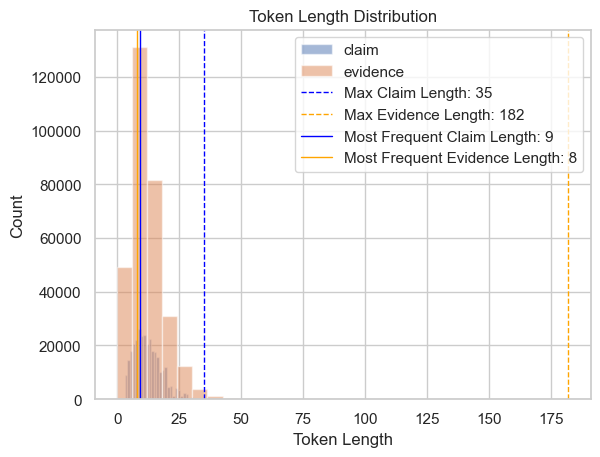

In [11]:
import matplotlib.pyplot as plt

#len of claim token 
train_pairs['claim_len'] = train_pairs['claim_tokens'].apply(len)

# len Evidence token
train_pairs['evidence_len'] = train_pairs['evidence_tokens'].apply(len)

# Merge Visualization
plt.hist(train_pairs['claim_len'], bins=30, alpha=0.5, label='claim')
plt.hist(train_pairs['evidence_len'], bins=30, alpha=0.5, label='evidence')

# Mark the highest value
max_claim_len = train_pairs['claim_len'].max()
max_evidence_len = train_pairs['evidence_len'].max()

plt.axvline(max_claim_len, color='blue', linestyle='dashed', linewidth=1, label=f'Max Claim Length: {max_claim_len}')
plt.axvline(max_evidence_len, color='orange', linestyle='dashed', linewidth=1, label=f'Max Evidence Length: {max_evidence_len}')

# Mark the value with the highest frequency
most_frequent_claim_len = train_pairs['claim_len'].value_counts().idxmax()
most_frequent_evidence_len = train_pairs['evidence_len'].value_counts().idxmax()

plt.axvline(most_frequent_claim_len, color='blue', linestyle='solid', linewidth=1, label=f'Most Frequent Claim Length: {most_frequent_claim_len}')
plt.axvline(most_frequent_evidence_len, color='orange', linestyle='solid', linewidth=1, label=f'Most Frequent Evidence Length: {most_frequent_evidence_len}')

plt.xlabel('Token Length')
plt.ylabel('Count')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

# Drop the length columns after visualization
train_pairs = train_pairs.drop(columns=['claim_len', 'evidence_len'])

In [12]:
from collections import Counter

# Step 1: Building a vocabulary
def build_vocab(train_df, min_freq=1):
    counter = Counter()

    for tokens in train_df['claim_tokens'].tolist() + train_df['evidence_tokens'].tolist():
        counter.update(tokens)

    vocab = {"<PAD>": 0, "<UNK>": 1}
    idx = 2
    for word, freq in counter.items():
        if freq >= min_freq:
            vocab[word] = idx
            idx += 1

    return vocab

# Step 2: tokens → index
def tokens_to_indices(tokens, vocab):
    return [vocab.get(t, vocab["<UNK>"]) for t in tokens]

# Step 3: padding
def pad_sequence(indices, max_len, pad_value=0):
    if len(indices) >= max_len:
        return indices[:max_len]
    else:
        return indices + [pad_value] * (max_len - len(indices))

# Step 4: Apply to train_pairs
MAX_LEN_CLAIM = 40
MAX_LEN_EVIDENCE = 190

# Build vocabulary with train_pairs
vocab = build_vocab(train_pairs)

# Perform token → index → ​​padding
train_pairs['claim_indices'] = train_pairs['claim_tokens'].apply(
    lambda x: pad_sequence(tokens_to_indices(x, vocab), MAX_LEN_CLAIM))

train_pairs['evidence_indices'] = train_pairs['evidence_tokens'].apply(
    lambda x: pad_sequence(tokens_to_indices(x, vocab), MAX_LEN_EVIDENCE))

train_pairs


,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 404, 55, 118, 7, 350, 288, 289, 1945, 1..."
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 245, 100, 907, 313, 1892, 7, 704, 802, 33..."
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 288, 289, 7, 3366, 946, 12, 2218, 3367, 39..."
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-761227,"[school, form, consolidation, six, high, schoo...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[2121, 537, 3368, 614, 6, 2121, 1808, 3317, 33..."
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-242072,"[sex, clean, underside, plant, leaf]",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[3376, 936, 3377, 12, 1568, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
311117,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-10186,"[measure, 162, 7, km, diameter, name, typhon, ...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[1041, 5623, 663, 4620, 5281, 1930, 5624, 5625..."
311118,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1112294,"[mother, take, edmonton, death, father, 1925]",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[2008, 470, 7587, 451, 3752, 5644, 0, 0, 0, 0,..."
311119,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-51631,"[disagreement, survive, source, jewish, histor...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[10029, 248, 624, 6084, 4539, 10030, 1459, 100..."
311120,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-373631,"[tamarisk, 's, entrance, locate, approximately...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[5632, 514, 5633, 1841, 2065, 5634, 4020, 540,..."


In [14]:
# Save train_pairs as JSON, one sample per line
train_pairs.to_json("../../data/train_pairs.json", orient="records", lines=True, force_ascii=False)

print("train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json")

# Loading the JSON file
train_pairs = pd.read_json("../../data/train_pairs.json", orient="records", lines=True)
train_pairs


train_pairs has been successfully saved as a JSON file：../../data/train_pairs.json


,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 404, 55, 118, 7, 350, 288, 289, 1945, 1..."
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 245, 100, 907, 313, 1892, 7, 704, 802, 33..."
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 288, 289, 7, 3366, 946, 12, 2218, 3367, 39..."
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-761227,"[school, form, consolidation, six, high, schoo...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[2121, 537, 3368, 614, 6, 2121, 1808, 3317, 33..."
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-242072,"[sex, clean, underside, plant, leaf]",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[3376, 936, 3377, 12, 1568, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
311117,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-10186,"[measure, 162, 7, km, diameter, name, typhon, ...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[1041, 5623, 663, 4620, 5281, 1930, 5624, 5625..."
311118,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1112294,"[mother, take, edmonton, death, father, 1925]",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[2008, 470, 7587, 451, 3752, 5644, 0, 0, 0, 0,..."
311119,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-51631,"[disagreement, survive, source, jewish, histor...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[10029, 248, 624, 6084, 4539, 10030, 1459, 100..."
311120,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-373631,"[tamarisk, 's, entrance, locate, approximately...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[5632, 514, 5633, 1841, 2065, 5634, 4020, 540,..."


# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a. Convert training samples (claim + evidence + label) into a format that PyTorch can read in batches and feed into model training

In [39]:
# Loading the JSON file to start
import pandas as pd
train_pairs = pd.read_json("../../data/train_pairs.json", orient="records", lines=True)
train_pairs

,claim_id,claim_tokens,evidence_id,evidence_tokens,label,claim_indices,evidence_indices
0,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-442946,"[high, concentration, 100, time, atmospheric, ...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 404, 55, 118, 7, 350, 288, 289, 1945, 1..."
1,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-1194317,"[plant, grow, much, 50, percent, faster, conce...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[12, 245, 100, 907, 313, 1892, 7, 704, 802, 33..."
2,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-12171,"[high, carbon, dioxide, concentration, favoura...",1,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 288, 289, 7, 3366, 946, 12, 2218, 3367, 39..."
3,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-761227,"[school, form, consolidation, six, high, schoo...",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[2121, 537, 3368, 614, 6, 2121, 1808, 3317, 33..."
4,claim-1937,"[scientific, evidence, co2, pollutant, high, c...",evidence-242072,"[sex, clean, underside, plant, leaf]",0,"[2, 3, 4, 5, 6, 4, 7, 8, 9, 10, 11, 12, 13, 14...","[3376, 936, 3377, 12, 1568, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
311117,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-10186,"[measure, 162, 7, km, diameter, name, typhon, ...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[1041, 5623, 663, 4620, 5281, 1930, 5624, 5625..."
311118,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-1112294,"[mother, take, edmonton, death, father, 1925]",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[2008, 470, 7587, 451, 3752, 5644, 0, 0, 0, 0,..."
311119,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-51631,"[disagreement, survive, source, jewish, histor...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[10029, 248, 624, 6084, 4539, 10030, 1459, 100..."
311120,claim-3093,"[send, oscillate, microwave, antenna, inside, ...",evidence-373631,"[tamarisk, 's, entrance, locate, approximately...",0,"[1698, 2139, 3348, 3349, 3350, 3351, 3352, 909...","[5632, 514, 5633, 1841, 2065, 5634, 4020, 540,..."


In [40]:
import torch

# Load GloVe vectors from a .txt file into a Python dictionary
def load_glove(glove_path='../../data/glove.6B/glove.6B.100d.txt'):
    glove = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]  # First token is the word
            vector = list(map(float, parts[1:]))  # Remaining tokens are the embedding values
            glove[word] = vector 
    return glove

# Create an embedding matrix from the vocab and the loaded GloVe vectors
def build_embedding_matrix(vocab, glove_dict, embedding_dim=100):
    # Initialize with small random values
    matrix = torch.randn(len(vocab), embedding_dim) * 0.05
    hits = 0  # Track how many vocab words are found in GloVe

    for word, idx in vocab.items():
        if word in glove_dict:
            matrix[idx] = torch.tensor(glove_dict[word])  # Replace random vector with GloVe vector
            hits += 1

    print(f"Found {hits}/{len(vocab)} words in GloVe")  # Coverage report
    return matrix


In [41]:
from torch.utils.data import Dataset
import torch

# Custom Dataset for triplet-based retrieval training
# Each sample consists of (claim, positive evidence, negative evidence)
class TripletRetrievalDataset(Dataset):
    def __init__(self, df):
        self.triplets = []

        # Group the dataframe by claim_id
        grouped = df.groupby('claim_id')

        for claim_id, group in grouped:
            # Separate positive and negative examples
            pos_rows = group[group['label'] == 1]
            neg_rows = group[group['label'] == 0]

            # Skip if this claim has no positive or negative samples
            if len(pos_rows) == 0 or len(neg_rows) == 0:
                continue

            # For each positive sample, pair it with one randomly sampled negative
            for _, pos in pos_rows.iterrows():
                for _, neg in neg_rows.sample(n=1).iterrows():
                    self.triplets.append((
                        pos['claim_indices'],     # Token indices of claim
                        pos['evidence_indices'],  # Token indices of positive evidence
                        neg['evidence_indices']   # Token indices of negative evidence
                    ))

    def __len__(self):
        return len(self.triplets)

    def __getitem__(self, idx):
        claim, pos_e, neg_e = self.triplets[idx]
        return {
            "claim": torch.tensor(claim, dtype=torch.long),
            "pos_evidence": torch.tensor(pos_e, dtype=torch.long),
            "neg_evidence": torch.tensor(neg_e, dtype=torch.long)
        }


In [42]:
from torch.utils.data import DataLoader

# Instantiate the triplet-format dataset from preprocessed training pairs
triplet_dataset = TripletRetrievalDataset(train_pairs)
# Create a DataLoader for batching and shuffling the training data
train_loader = DataLoader(triplet_dataset, batch_size=32, shuffle=True)


### b. Define and train the LSTM Model

In [44]:
# 1. LSTM-based Retrieval Model for Claim-Evidence Matching
import torch
import torch.nn as nn

class LSTMRetrievalModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, pretrained_weights=None):
        super().__init__()

        # Embedding layer: maps token IDs to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Optional: load pre-trained word embeddings (e.g. GloVe)
        if pretrained_weights is not None:
            self.embedding.weight.data.copy_(pretrained_weights)

        # Bidirectional LSTM for context-aware encoding
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)

        # Matching classifier: a small 2-layer MLP to score claim-evidence pairs
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 8, hidden_dim * 4),  # 256*4 → 512
            nn.ReLU(),
            nn.Dropout(0.2),                            # Regularization
            nn.Linear(hidden_dim * 4, 1)                # Output scalar score
        )

    def encode(self, x):
        """
        Encode input sequence (claim or evidence) into a fixed-length vector.
        Uses max pooling over BiLSTM outputs.
        """
        emb = self.embedding(x)                 # [B, T, emb_dim]
        output, _ = self.lstm(emb)              # [B, T, 2*hidden]
        pooled, _ = torch.max(output, dim=1)    # [B, 2*hidden]
        return pooled

    def forward(self, claim, evidence):
        """
        Given claim and evidence tensors, compute a matching score.
        Combines the encoded representations using concatenation, difference, and element-wise product.
        """
        c = self.encode(claim)                  # [B, 2*hidden]
        e = self.encode(evidence)               # [B, 2*hidden]

        # Combine using concatenation + absolute difference + interaction
        combined = torch.cat([c, e, torch.abs(c - e), c * e], dim=1)  # [B, 8*hidden]

        return self.classifier(combined).squeeze(1)  # Output: [B]





In [45]:
# 2. Model initialization with pretrained GloVe embeddings

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load GloVe vectors and build embedding matrix for current vocab
glove_dict = load_glove("../../data/glove.6B/glove.6B.100d.txt")
embedding_matrix = build_embedding_matrix(vocab, glove_dict, embedding_dim=100)

# Initialize LSTM-based retrieval model
model = LSTMRetrievalModel(
    vocab_size=len(vocab),
    embedding_dim=100,
    hidden_dim=128,
    pretrained_weights=embedding_matrix
).to(device)

# Optimizer and loss for triplet ranking
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MarginRankingLoss(margin=1.0)



Found 22601/27239 words in GloVe


In [46]:
# 3. Training function with progress bar
from torch.optim import Adam
from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0.0

    for batch in tqdm(dataloader, desc="Training"):
        # Move inputs to device
        claim = batch['claim'].to(device)
        pos_evidence = batch['pos_evidence'].to(device)
        neg_evidence = batch['neg_evidence'].to(device)

        # Forward pass for positive and negative pairs
        pos_score = model(claim, pos_evidence)
        neg_score = model(claim, neg_evidence)

        # MarginRankingLoss: want pos_score > neg_score
        target = torch.ones_like(pos_score)
        loss = criterion(pos_score, neg_score, target)

        # Backpropagation and parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)



In [47]:
# Training loop
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    avg_loss = train_one_epoch(model, train_loader, optimizer, criterion)
    print(f"Epoch {epoch}/{EPOCHS} - Avg Loss: {avg_loss:.4f}")


Training: 100%|██████████| 129/129 [00:02<00:00, 57.15it/s]


Epoch 1/10 - Avg Loss: 0.0980


Training: 100%|██████████| 129/129 [00:01<00:00, 77.44it/s]


Epoch 2/10 - Avg Loss: 0.0118


Training: 100%|██████████| 129/129 [00:01<00:00, 77.03it/s]


Epoch 3/10 - Avg Loss: 0.0034


Training: 100%|██████████| 129/129 [00:01<00:00, 77.21it/s]


Epoch 4/10 - Avg Loss: 0.0010


Training: 100%|██████████| 129/129 [00:01<00:00, 75.20it/s]


Epoch 5/10 - Avg Loss: 0.0014


Training: 100%|██████████| 129/129 [00:01<00:00, 77.46it/s]


Epoch 6/10 - Avg Loss: 0.0026


Training: 100%|██████████| 129/129 [00:01<00:00, 77.59it/s]


Epoch 7/10 - Avg Loss: 0.0019


Training: 100%|██████████| 129/129 [00:01<00:00, 76.77it/s]


Epoch 8/10 - Avg Loss: 0.0023


Training: 100%|██████████| 129/129 [00:01<00:00, 77.08it/s]


Epoch 9/10 - Avg Loss: 0.0009


Training: 100%|██████████| 129/129 [00:01<00:00, 79.77it/s]


Epoch 10/10 - Avg Loss: 0.0048


In [48]:
# 4. Save the trained model
import os
model_save_path = os.path.join(os.getcwd(), "model_final.pt")
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to：{model_save_path}")


Model saved to：d:\Academic_Stuff\Coding_Save\notebooks\NLP\COMP90042_2025_A3\code_files\ximingwan\model_final.pt


# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

### a. evaluate the result from dev set

In [49]:
# Rebuilding the model structure
model = LSTMRetrievalModel(vocab_size=len(vocab), embedding_dim=100, hidden_dim=128)

# Load the trained parameters
import os
model_path = os.path.join(os.getcwd(), "model_final.pt")
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()


LSTMRetrievalModel(
  (embedding): Embedding(27239, 100, padding_idx=0)
  (lstm): LSTM(100, 128, batch_first=True, bidirectional=True)
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

In [50]:
import json
import torch
from tqdm import tqdm

def predict_and_export_from_json(json_path, model, vocab, evidence_dict,
                                 top_k=6, max_len_claim=40, max_len_evidence=190,
                                 save_path="predictions.json", batch_size=1024):
    """
    Efficient GPU inference: encode all evidences once, then compute similarity with each claim.
    """
    device = next(model.parameters()).device
    model.eval()

    # Step 1: Load and preprocess claims
    with open(json_path, 'r') as f:
        raw_data = json.load(f)
    df = json_to_df(raw_data, data_type="unknown")
    df['claim_tokens'] = df['claim_text'].apply(preprocess_text)

    # Step 2: Encode all evidences into tensor
    evid_ids = list(evidence_dict.keys())
    evid_tensor_list = [
        pad_sequence(tokens_to_indices(evidence_dict[eid], vocab), max_len_evidence)
        for eid in evid_ids
    ]
    evidence_tensor = torch.tensor(evid_tensor_list, dtype=torch.long).to(device)

    # Step 3: Batch-encode all evidences
    with torch.no_grad():
        evidence_vecs = []
        for i in tqdm(range(0, len(evidence_tensor), batch_size), desc="Encoding evidences"):
            batch = evidence_tensor[i:i+batch_size]
            batch_vec = model.encode(batch)  # [B, 2*hidden]
            evidence_vecs.append(batch_vec)
        evidence_vecs = torch.cat(evidence_vecs, dim=0)  # [N, 2*hidden]

    # Step 4: Score each claim against all evidence vectors
    output_dict = {}
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Scoring claims"):
        claim_id = row['id']
        claim_tokens = row['claim_tokens']
        claim_idx = pad_sequence(tokens_to_indices(claim_tokens, vocab), max_len_claim)
        claim_tensor = torch.tensor([claim_idx], dtype=torch.long).to(device)

        with torch.no_grad():
            claim_vec = model.encode(claim_tensor)  # [1, 2*hidden]
            c = claim_vec.expand(evidence_vecs.size(0), -1)  # [N, 2*hidden]
            e = evidence_vecs
            combined = torch.cat([c, e, torch.abs(c - e), c * e], dim=1)  # [N, 8*hidden]
            scores = model.classifier(combined).squeeze(1)  # [N]

        # Step 5: Select top-k evidence IDs
        topk_evid = [eid for eid, _ in sorted(zip(evid_ids, scores.tolist()), key=lambda x: x[1], reverse=True)[:top_k]]

        output_dict[claim_id] = {
            "claim_label": row.get("claim_label", "SUPPORTS"),  # Placeholder label
            "evidences": topk_evid
        }

    # Step 6: Save results
    with open(save_path, 'w') as f:
        json.dump(output_dict, f, indent=2)

    print(f"Prediction results saved to: {save_path}")





In [51]:
# Preddict and save the results on the dev set
predict_and_export_from_json(
    json_path="../../data/dev-claims.json",
    model=model,
    vocab=vocab,
    evidence_dict=evidence_data_tokens,
    save_path="../../data/dev-claims-predictions-lstm-batch.json"
)


Scoring claims: 100%|██████████| 154/154 [09:07<00:00,  3.55s/it]


Prediction results saved to: ../../data/dev-claims-predictions-lstm-batch.json


In [52]:
with open('../../data/dev-claims-predictions-lstm-batch.json', 'r') as f:
    result_data = json.load(f)
result_data

{'claim-752': {'claim_label': 'SUPPORTS',
  'evidences': ['evidence-1075134',
   'evidence-83980',
   'evidence-102693',
   'evidence-623328',
   'evidence-702160',
   'evidence-236567']},
 'claim-375': {'claim_label': 'NOT_ENOUGH_INFO',
  'evidences': ['evidence-142343',
   'evidence-257475',
   'evidence-349143',
   'evidence-1066077',
   'evidence-121187',
   'evidence-28478']},
 'claim-1266': {'claim_label': 'SUPPORTS',
  'evidences': ['evidence-694262',
   'evidence-306479',
   'evidence-451203',
   'evidence-340365',
   'evidence-516337',
   'evidence-563145']},
 'claim-871': {'claim_label': 'NOT_ENOUGH_INFO',
  'evidences': ['evidence-786450',
   'evidence-1049028',
   'evidence-672961',
   'evidence-69985',
   'evidence-678795',
   'evidence-362943']},
 'claim-2164': {'claim_label': 'REFUTES',
  'evidences': ['evidence-903119',
   'evidence-947243',
   'evidence-1010458',
   'evidence-726093',
   'evidence-626101',
   'evidence-824669']},
 'claim-1607': {'claim_label': 'NOT_ENO

In [53]:
# display the evaulation results
!python ../../eval.py \
  --predictions ../../data/dev-claims-predictions-lstm-batch.json \
  --groundtruth ../../data/dev-claims.json


Evidence Retrieval F-score (F)    = 0.037188677123742055
Claim Classification Accuracy (A) = 1.0
Harmonic Mean of F and A          = 0.07171053433955923


### b. evaluate the result from train set

In [54]:
with open('../../data/train-claims.json', 'r') as f:
    train_data = json.load(f)

# Sample 154 records
sample_ids = list(train_data.keys())
sample_ids = sorted(sample_ids)[:154]

# Constructing a new sample dictionary
sampled_train_data = {cid: train_data[cid] for cid in sample_ids}


In [55]:
# save the sampled data
with open('../../data/train_sample_154.json', 'w') as f:
    json.dump(sampled_train_data, f, indent=2)


In [56]:
predict_and_export_from_json(
    json_path='../../data/train_sample_154.json',
    model=model,
    vocab=vocab,
    evidence_dict=evidence_data_tokens,
    save_path='../../data/train_sample_154_predictions.json',
    top_k=6  # or other value
)


Scoring claims: 100%|██████████| 154/154 [09:06<00:00,  3.55s/it]


Prediction results saved to: ../../data/train_sample_154_predictions.json


In [57]:
# display the evaulation results
!python ../../eval.py \
  --predictions ../../data/train_sample_154_predictions.json \
  --groundtruth ../../data/train_sample_154.json

Evidence Retrieval F-score (F)    = 0.04082944472554862
Claim Classification Accuracy (A) = 1.0
Harmonic Mean of F and A          = 0.07845559122573582


In [33]:
with open("../../data/train_sample_154_predictions.json") as f:
    preds = json.load(f)

for cid, pred in list(preds.items())[:5]:
    print(f"Claim ID: {cid}")
    print(f"Predicted Evidence IDs: {pred['evidences']}")
    print()


Claim ID: claim-0
Predicted Evidence IDs: ['evidence-1184933', 'evidence-903119', 'evidence-698828', 'evidence-1067341', 'evidence-792207', 'evidence-797505']

Claim ID: claim-10
Predicted Evidence IDs: ['evidence-1092497', 'evidence-914228', 'evidence-251634', 'evidence-548766', 'evidence-666859', 'evidence-425667']

Claim ID: claim-100
Predicted Evidence IDs: ['evidence-613978', 'evidence-932266', 'evidence-698828', 'evidence-1196923', 'evidence-401833', 'evidence-13780']

Claim ID: claim-1007
Predicted Evidence IDs: ['evidence-1067341', 'evidence-44588', 'evidence-251634', 'evidence-1065311', 'evidence-1092497', 'evidence-36994']

Claim ID: claim-101
Predicted Evidence IDs: ['evidence-508805', 'evidence-396660', 'evidence-697238', 'evidence-1170', 'evidence-1088556', 'evidence-480552']



## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*